# **Detection of Duplicate Questions**

**Exploratory Data Analysis(EDA)**


In [47]:
# Importing Libraries
# SEABORN AND MATPLOTLIB is for Data Visualization, we will use those in EDA as well.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/Users/kushjani/Documents/Documents/Stevens/Study/Semester 2/NLP/Project/questions.csv')

In [49]:
# To chech whether our data contains Null values or not we will check basic information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [50]:
# To double verify we will check missing values as well 
df.isnull().sum()

# As per results there are 1 missing values in Question 1 and 2 in Question 2, we will handle this misisng values later.

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [51]:
# Also we need to check whether our data contains Duplicate values or not
df.duplicated().sum()

# As per reuluts we can say that there are no duplicate value sin our data

0

In [52]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [53]:
# To check the number of rows and columns of data (Dimensions) we will use df.shape
df.shape

(404351, 6)

In [54]:
# Let's check some stats of our duplicate and non-duplicate question pairs
print(df['is_duplicate'].value_counts())

0    255045
1    149306
Name: is_duplicate, dtype: int64


In [55]:
# Let's check that how much percentage of duplicate and non duplicate question pairs are there
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

# As per results 63.07% of data is non-duplicate and 36.92% od data is duplicate

0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


<AxesSubplot:>

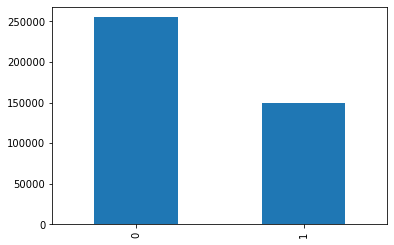

In [56]:
# Let's do visulization of this stats we calculated using barplot
df['is_duplicate'].value_counts().plot(kind='bar')

# From our graph we can say that our data is bit unbalanced, it is more 0 side

In [57]:
# we have around 4lakh+ questions in Question1 attribute and around 4lakh+ in Question2 attribute
# So from total 8lakh questions let's check how many are repeated and non-repeated

Question_id = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Unique Question: ', np.unique(Question_id).shape[0])
x = Question_id.value_counts()>1
print('Repeated Questions: ', x[x].shape[0])


# As per results we can say that there are 7,89,801 Unique Questions and 13,698 Duplicate Questions

Unique Question:  789801
Repeated Questions:  13698


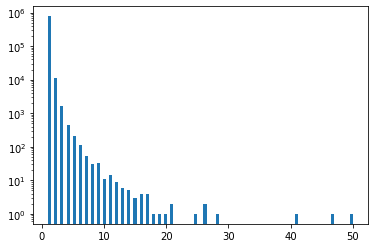

In [58]:
# Let's make a histogram plot for above outcomes
plt.hist(Question_id.value_counts().values, bins = 100)
plt.yscale('log')
plt.show()

In [59]:
# Whene we are working in a such a huge dataset it is to difficult to implement model, 
# even it is also hard for machine to run 4 lkh+ rows and give output, it is too much time consuming,
# in order to reduce our time complexity we are minimizing our data set into 30000
NEW_df = df.sample(30000, random_state = 1)
# we are using random_state parameter so that everytime when we select random_state=1 we get same random pairs

In [184]:
NEW_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 33270 to 67253
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              30000 non-null  int64  
 1   qid1            30000 non-null  int64  
 2   qid2            30000 non-null  int64  
 3   question1       30000 non-null  object 
 4   question2       30000 non-null  object 
 5   is_duplicate    30000 non-null  int64  
 6   Length_Q1       30000 non-null  int64  
 7   Length_Q2       30000 non-null  int64  
 8   #_words_Q1      30000 non-null  int64  
 9   #_words_Q2      30000 non-null  int64  
 10  #_common_words  30000 non-null  int64  
 11  Total_Words     30000 non-null  int64  
 12  Share_Words     30000 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 3.2+ MB


In [60]:
# Let's check do we have any null values in our new Data frame or not
NEW_df.isnull().sum()

# Fortunetly in our new data frame there are no null values

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [61]:
# Let's check do we have any duplicate values or not in our new_df
NEW_df.duplicated().sum()

# As per the outcome we do not have any duplicate rows here

0

In [62]:
# Let's make a Questions Data frame in which we only have question pairs, we will avaoid other attributes here
questions_df = NEW_df[['question1','question2']]
questions_df.head()

,question1,question2
33270,How do you turn on a Honeywell thermostat?,How do you set a Honeywell Thermostat?
105697,What are some of the reasons for not wearing j...,Which satellite does Multichoice use?
264166,What is scientific proof or explanation for gh...,Can science explain the existence of ghosts?
307014,Which places I should visit in jaipur?,Which places one should visit in chandigarh?
256448,What was the Boxer Rebellion?,What was the Boxer Rebellion about?


In [63]:
from sklearn.feature_extraction.text import CountVectorizer # Importing Count Vectorizer function 
# merging texts
merge_questions_df = list(questions_df['question1']) + list(questions_df['question2']) # Creating list of Question1 and Question 2

v = CountVectorizer(max_features=3000) # limiting features to 3000
q1_arr, q2_arr = np.vsplit(v.fit_transform(merge_questions_df).toarray(),2) # Implimenting transform

In [64]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape
# As per result we now have 6000 feautures, from that 3000 bag of words are of question1 and 3000 bag of words are for question2

(30000, 6000)

In [65]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
193380,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
72666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
temp_df['is_duplicate'] = new_df['is_duplicate'] # Checking that do we have any duplicate questions in our temp data frame or not

In [67]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
193380,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
72666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
296747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
114127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
316812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Now without doing anything let's randomly train our model using Random Forest Classifier so that we can altleast get the accuracy of our model without doing anything
from sklearn.model_selection import train_test_split

# Imported train-test_split function from the model_selection class of sklearn library

In [69]:
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)
#Splited our data in 80%-20% ratio, 80% data for Training and remaining 20% for testing

In [70]:
from sklearn.ensemble import RandomForestClassifier #Imported RandomForestClaasifier for Training model
from sklearn.metrics import accuracy_score #imported accurancy_score function to calculate accuracy of our model after getting trained
rf = RandomForestClassifier() # Implementing model
rf.fit(X_train,y_train) # Fitting training data
y_pred = rf.predict(X_test) # Predicting data
ac = accuracy_score(y_test,y_pred) # Calculationg accuracy score
Accuracy_Percentage = ac*100

In [72]:
# Random Forest Classifier Model Accuracy
Accuracy_Percentage

61.21666666666666

In [73]:
# Let's apply another algorithm as well so that we can compare both algorithm's accuracy without doing anything

In [74]:
!pip install xgboost

In [75]:
# so another algorith we are applying XG Boost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
ac2 = accuracy_score(y_test,y_pred)
accuracy_Percentag_xgb = ac2*100

In [76]:
# XG Boost Classifier Model accuracy
accuracy_Percentag_xgb

62.4

In [77]:
# so as per SG Boost Classifier Model's accuracy and Random Forect Classifier Model's accuracy
#we are getting accuracy around 62% without doing anything

0    18861
1    11139
Name: is_duplicate, dtype: int64
0    62.87
1    37.13
Name: is_duplicate, dtype: float64


<AxesSubplot:>

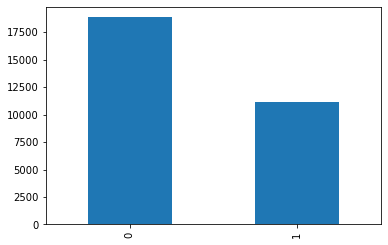

In [82]:
# As we created plot for 4lakh+ rows, here we are making the same plot but for 30000 rows
# Distribution of duplicate and non-duplicate questions

print(NEW_df['is_duplicate'].value_counts())
print((NEW_df['is_duplicate'].value_counts()/NEW_df['is_duplicate'].count())*100)
NEW_df['is_duplicate'].value_counts().plot(kind='bar')

In [84]:
# Let's check that in this new data frame is there any repeated question pairs or not, if yes than also check the number

qid = pd.Series(NEW_df['qid1'].tolist() + NEW_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

# As per results there are 59836 unique questions and 153 repeated questions

Number of unique questions 59836
Number of questions getting repeated 153


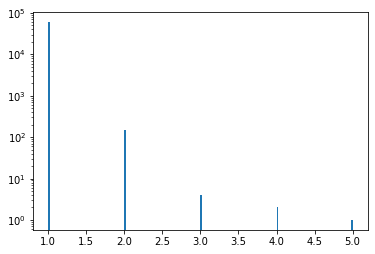

In [85]:
# Let's make a histogram plot for above outcomes

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [79]:
# To increase the accuracy of our model and to making it more perfect
# We will add more features in our data
# which is also known as feature engineering

In [80]:
# We will make seven new feautures as per mentioned below;

# 1.Character Length of Question1: Length_Q1
# 2.Character Length of Question2: Length_Q2
# 3.Number of words in Question1: #_words_Q1
# 4.Number of words in Question2: #_words_Q2
# 5.Number of Common UNIQUE Words: #_Common_Words
# 6.Total Number in Q1 + Total + number of words in Question2: Total_Words
# 7.Word Common/Word Total: share_word

In [90]:
# Now Let's Begain Feature Engineering

NEW_df['Length_Q1'] = NEW_df['question1'].str.len() 
NEW_df['Length_Q2'] = NEW_df['question2'].str.len()

# Here we are now adding two more features which are Question 1 length and Question2 length

In [92]:
NEW_df.head()

# as per the outcoms we can see that our 2 new features are added in the data frame

,id,qid1,qid2,question1,question2,is_duplicate,Length_Q1,Length_Q2
33270,33270,66310,66311,How do you turn on a Honeywell thermostat?,How do you set a Honeywell Thermostat?,0,42,38
105697,105697,209646,209647,What are some of the reasons for not wearing j...,Which satellite does Multichoice use?,0,51,37
264166,264166,519752,519753,What is scientific proof or explanation for gh...,Can science explain the existence of ghosts?,0,51,44
307014,307014,602760,602761,Which places I should visit in jaipur?,Which places one should visit in chandigarh?,0,38,44
256448,256448,504767,504768,What was the Boxer Rebellion?,What was the Boxer Rebellion about?,1,29,35


In [96]:
# Here we are adding 2 more new features
# one is Number of words in Question1 and second is number if words in Question2
NEW_df['#_words_Q1'] = NEW_df['question1'].apply(lambda row: len(row.split(" ")))
NEW_df['#_words_Q2'] = NEW_df['question2'].apply(lambda row: len(row.split(" ")))

In [98]:
NEW_df.head()
# As per the output we can see that, 2 more new feature has been added in the dataset.

,id,qid1,qid2,question1,question2,is_duplicate,Length_Q1,Length_Q2,#_words_Q1,#_words_Q2
33270,33270,66310,66311,How do you turn on a Honeywell thermostat?,How do you set a Honeywell Thermostat?,0,42,38,8,7
105697,105697,209646,209647,What are some of the reasons for not wearing j...,Which satellite does Multichoice use?,0,51,37,10,5
264166,264166,519752,519753,What is scientific proof or explanation for gh...,Can science explain the existence of ghosts?,0,51,44,8,7
307014,307014,602760,602761,Which places I should visit in jaipur?,Which places one should visit in chandigarh?,0,38,44,7,7
256448,256448,504767,504768,What was the Boxer Rebellion?,What was the Boxer Rebellion about?,1,29,35,5,6


In [104]:
# Here we are making one function which will help us to make a new feature to find common words between Question1 set and Question2 set
def number_of_Common_Words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [109]:
# Here we are applying that function to add one more feature in our data frame
NEW_df['#_common_words'] = NEW_df.apply(number_of_Common_Words, axis=1)

In [110]:
NEW_df.head()

# As we can see o=new feature is added in our data frame named #_common_words

,id,qid1,qid2,question1,question2,is_duplicate,Length_Q1,Length_Q2,#_words_Q1,#_words_Q2,#_common_words
33270,33270,66310,66311,How do you turn on a Honeywell thermostat?,How do you set a Honeywell Thermostat?,0,42,38,8,7,6
105697,105697,209646,209647,What are some of the reasons for not wearing j...,Which satellite does Multichoice use?,0,51,37,10,5,0
264166,264166,519752,519753,What is scientific proof or explanation for gh...,Can science explain the existence of ghosts?,0,51,44,8,7,1
307014,307014,602760,602761,Which places I should visit in jaipur?,Which places one should visit in chandigarh?,0,38,44,7,7,5
256448,256448,504767,504768,What was the Boxer Rebellion?,What was the Boxer Rebellion about?,1,29,35,5,6,4


In [111]:
# Here we are making one more function to find the Total Number in Q1 + Total + number of words in Question2: Total_Words

def Total_Words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [156]:
# Here we are applying that function which we created above

NEW_df['Total_Words'] = NEW_df.apply(Total_Words, axis=1)

In [157]:
NEW_df.head()

# As per outcomes we can see that our new feature is also added named Total_Words

,id,qid1,qid2,question1,question2,is_duplicate,Length_Q1,Length_Q2,#_words_Q1,#_words_Q2,#_common_words,Total_Words,Share_Words
33270,33270,66310,66311,How do you turn on a Honeywell thermostat?,How do you set a Honeywell Thermostat?,0,42,38,8,7,6,15,NaN
105697,105697,209646,209647,What are some of the reasons for not wearing j...,Which satellite does Multichoice use?,0,51,37,10,5,0,15,NaN
264166,264166,519752,519753,What is scientific proof or explanation for gh...,Can science explain the existence of ghosts?,0,51,44,8,7,1,15,NaN
307014,307014,602760,602761,Which places I should visit in jaipur?,Which places one should visit in chandigarh?,0,38,44,7,7,5,14,NaN
256448,256448,504767,504768,What was the Boxer Rebellion?,What was the Boxer Rebellion about?,1,29,35,5,6,4,11,NaN


In [158]:
# Finally, here we are making our last feature which is - Word Common/Word Total: share_word
NEW_df['Share_Words'] = round(NEW_df['#_common_words']/NEW_df['Total_Words'],2)

In [159]:
NEW_df.head()

# As per the results we can see that our last feature is also added named Share_Words

,id,qid1,qid2,question1,question2,is_duplicate,Length_Q1,Length_Q2,#_words_Q1,#_words_Q2,#_common_words,Total_Words,Share_Words
33270,33270,66310,66311,How do you turn on a Honeywell thermostat?,How do you set a Honeywell Thermostat?,0,42,38,8,7,6,15,0.40
105697,105697,209646,209647,What are some of the reasons for not wearing j...,Which satellite does Multichoice use?,0,51,37,10,5,0,15,0.00
264166,264166,519752,519753,What is scientific proof or explanation for gh...,Can science explain the existence of ghosts?,0,51,44,8,7,1,15,0.07
307014,307014,602760,602761,Which places I should visit in jaipur?,Which places one should visit in chandigarh?,0,38,44,7,7,5,14,0.36
256448,256448,504767,504768,What was the Boxer Rebellion?,What was the Boxer Rebellion about?,1,29,35,5,6,4,11,0.36


Minimum Characters Per Question:-  1
Maximum Characters Per Question:-  413
Average Number of Characters Per Question:-  59


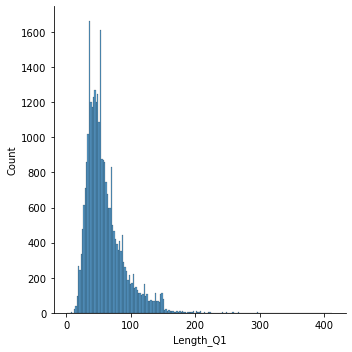

In [160]:
# Now let's do a quick analysis of our features so that we can check that everything is going good or not
# Let's start with our 1st feature "Length_Q1"

sns.displot(NEW_df['Length_Q1'])
print('Minimum Characters Per Question:- ',NEW_df['Length_Q1'].min())
print('Maximum Characters Per Question:- ',NEW_df['Length_Q1'].max())
print('Average Number of Characters Per Question:- ',int(NEW_df['Length_Q1'].mean()))

# as per the EDA we can say that there are
# Minimum Characters Per Question:-  1
# Maximum Characters Per Question:-  413
# Average Number of Characters Per Question:-  59

Minimum Characters Per Question:-  5
Maximum Characters Per Question:-  364
Average Number of Characters Per Question:-  60


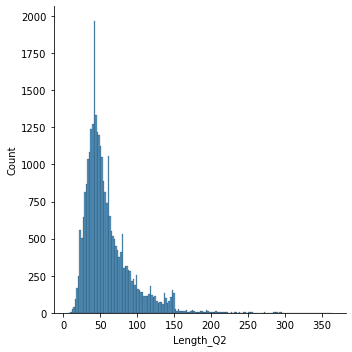

In [161]:
# Data Visualization for 2nd feature "Length_Q2"

sns.displot(NEW_df['Length_Q2'])
print('Minimum Characters Per Question:- ',NEW_df['Length_Q2'].min())
print('Maximum Characters Per Question:- ',NEW_df['Length_Q2'].max())
print('Average Number of Characters Per Question:- ',int(NEW_df['Length_Q2'].mean()))

# as per the EDA we can say that there are
# Minimum Characters Per Question:-  5
# Maximum Characters Per Question:-  364
# Average Number of Characters Per Question:-  60

Minimum Characters Per Question 1
Maximum Characters Per Question 79
Average Number of Characters Per Question 10


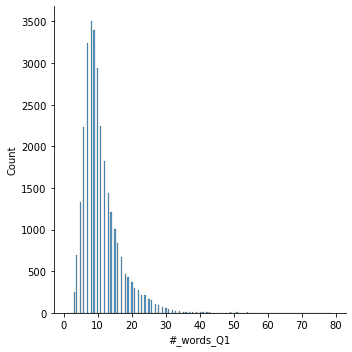

In [162]:
# Data Visualization for 3rd feature "#_words_Q1"

sns.displot(NEW_df['#_words_Q1'])
print('Minimum Characters Per Question',NEW_df['#_words_Q1'].min())
print('Maximum Characters Per Question',NEW_df['#_words_Q1'].max())
print('Average Number of Characters Per Question',int(NEW_df['#_words_Q1'].mean()))

# as per the EDA we can say that there are
# Minimum Characters Per Question:-  1
# Maximum Characters Per Question:-  79
# Average Number of Characters Per Question:-  10

Minimum Characters Per Question 2
Maximum Characters Per Question 77
Average Number of Characters Per Question 11


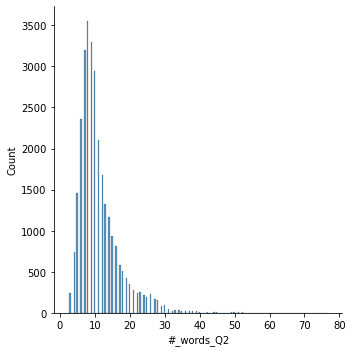

In [163]:
# Data Visualization for 4th feature "#_words_Q2"

sns.displot(NEW_df['#_words_Q2'])
print('Minimum Characters Per Question',NEW_df['#_words_Q2'].min())
print('Maximum Characters Per Question',NEW_df['#_words_Q2'].max())
print('Average Number of Characters Per Question',int(NEW_df['#_words_Q2'].mean()))

# as per the EDA we can say that there are
# Minimum Characters Per Question:-  2
# Maximum Characters Per Question:-  77
# Average Number of Characters Per Question:-  11

/Users/kushjani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kushjani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


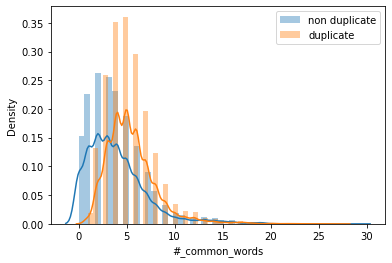

In [164]:
# Here in EDA for Non-Diplicate and Duplicate we will use differenst visualization, instead of using displot we will use distplot which 
# will be differentiate between 2 categories which are Non-Diplicate and Duplicate one.

# Data Visualization for 5th feature "#_common_words"

sns.distplot(NEW_df[NEW_df['is_duplicate'] == 0]['#_common_words'],label='non duplicate')
sns.distplot(NEW_df[NEW_df['is_duplicate'] == 1]['#_common_words'],label='duplicate')
plt.legend()
plt.show()

/Users/kushjani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kushjani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


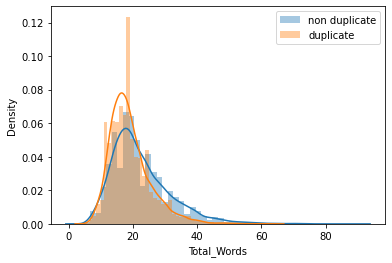

In [165]:
# Data Visualization for 6th feature "Total_Words"

sns.distplot(NEW_df[NEW_df['is_duplicate'] == 0]['Total_Words'],label='non duplicate')
sns.distplot(NEW_df[NEW_df['is_duplicate'] == 1]['Total_Words'],label='duplicate')
plt.legend()
plt.show()

/Users/kushjani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kushjani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


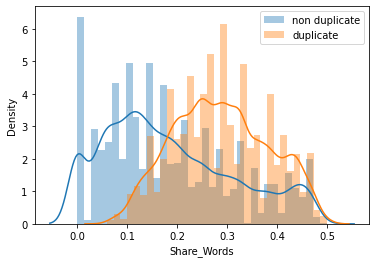

In [166]:
# Data Visualization for 7th and last feature "Share_Words"

sns.distplot(NEW_df[NEW_df['is_duplicate'] == 0]['Share_Words'],label='non duplicate')
sns.distplot(NEW_df[NEW_df['is_duplicate'] == 1]['Share_Words'],label='duplicate')
plt.legend()
plt.show()

In [167]:
# Now we will make two different data frames in which we will store 2 kind of different data
# First is Questions_df in which we will store only questions
# Second is Final_df in which we will store is_duplicate and our seven features

In [168]:
Questions_df = NEW_df[['question1','question2']]

In [169]:
Questions_df.head()

,question1,question2
33270,How do you turn on a Honeywell thermostat?,How do you set a Honeywell Thermostat?
105697,What are some of the reasons for not wearing j...,Which satellite does Multichoice use?
264166,What is scientific proof or explanation for gh...,Can science explain the existence of ghosts?
307014,Which places I should visit in jaipur?,Which places one should visit in chandigarh?
256448,What was the Boxer Rebellion?,What was the Boxer Rebellion about?


In [170]:
Final_df = NEW_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [171]:
Final_df

,is_duplicate,Length_Q1,Length_Q2,#_words_Q1,#_words_Q2,#_common_words,Total_Words,Share_Words
33270,0,42,38,8,7,6,15,0.40
105697,0,51,37,10,5,0,15,0.00
264166,0,51,44,8,7,1,15,0.07
307014,0,38,44,7,7,5,14,0.36
256448,1,29,35,5,6,4,11,0.36
...,...,...,...,...,...,...,...,...
83865,0,17,14,4,4,2,8,0.25
401769,0,30,46,5,7,3,12,0.25
29606,1,43,40,9,7,5,16,0.31
393107,0,44,34,9,7,3,16,0.19


In [172]:
from sklearn.feature_extraction.text import CountVectorizer   # Here we import CountVectorizer funtion from feature_extraction.text class of sklearn library for merging texts
# Here we will use Count Vectorizer function for merging texts
Ques = list(Questions_df['question1']) + list(Questions_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(Ques).toarray(),2)

In [173]:
temp_df1 = pd.DataFrame(q1_arr, index= Questions_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= Questions_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [174]:
Final_df = pd.concat([Final_df, temp_df], axis=1)
print(Final_df.shape)
Final_df.head()

(30000, 6008)


,is_duplicate,Length_Q1,Length_Q2,#_words_Q1,#_words_Q2,#_common_words,Total_Words,Share_Words,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
33270,0,42,38,8,7,6,15,0.40,0,0,...,0,0,1,0,0,0,0,0,0,0
105697,0,51,37,10,5,0,15,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
264166,0,51,44,8,7,1,15,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
307014,0,38,44,7,7,5,14,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
256448,1,29,35,5,6,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Final_df.iloc[:,1:].values,Final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
ac = accuracy_score(y_test,y_pred                   

In [179]:
# RandomForestClassifier Accuracy Percentage
ac_score = ac*100
print(ac_score)

# Before when we run the model over accuracy was only 61.21666%, after adding seven new features we do a improvement of 
# 14-15%, that is really great

75.98333333333333


In [181]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
xgb_ac = accuracy_score(y_test,y_pred1)

In [182]:
# XGBClassifier Accuracy Percentage
xgb_ac_score = xgb_ac*100
print(xgb_ac_score)

# Before when we run the model over accuracy was only 62.4%, after adding seven new features we do a improvement of 
# 13-14%, that is really great

75.36666666666667


In [183]:
# To improve more we will do Advance feature engineering